In [6]:
import sys, os
modulepath = os.path.abspath("ssh_1d_cpp/build/bin-module/")
sys.path.insert(0,modulepath)

In [7]:
import ssh_1d
import numpy as np

N = 10
Ns = 2*N+1
psi0 = 0.01
t0=0.
t_end=1200
dt = 0.01

gamA = 0.16
gamB = gamA
gA = 0.44 + gamA
gB = 0
t1=1
t2=0.7

time_series = ssh_1d.time_series(N, psi0, gA, gB, gamA, gamB, t_end, dt, t1, t2)


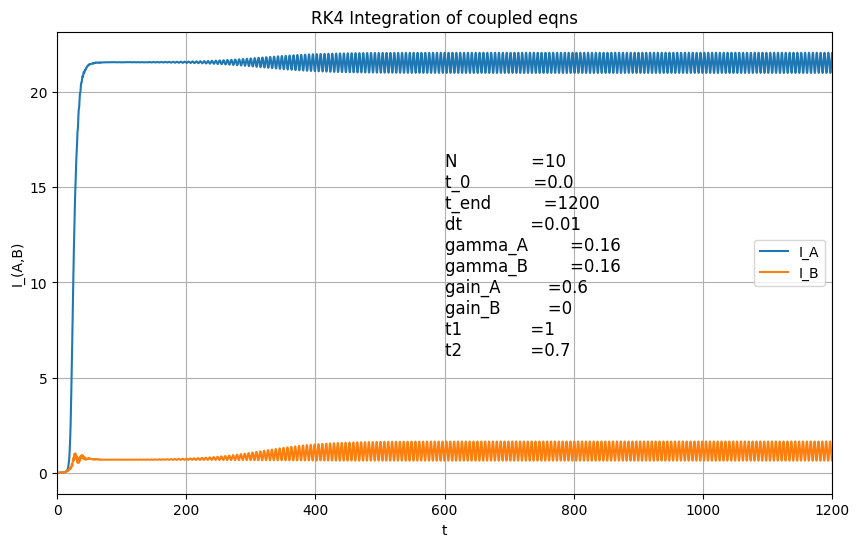

In [8]:
import matplotlib.pyplot as plt

t_values = time_series[:,0].real
psi_values = time_series[:,1:]

IA = np.sum(np.abs(psi_values[:,0::2])**2, axis=1)
IB = np.sum(np.abs(psi_values[:,1::2])**2, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t_values, IA, label='I_A')
ax.plot(t_values, IB, label='I_B')

ax.set_xlabel('t')
ax.set_ylabel('I_(A,B)')
ax.legend()
ax.set_title('RK4 Integration of coupled eqns')
# ax.set_xlim((400,600))
# ax.set_ylim((30.2499,30.2501))
ax.set_xmargin(0)
ax.grid(True)
params = {'N':N, 't_0':t0, 't_end': t_end, 'dt':dt, 'gamma_A':gamA, 'gamma_B':gamB, 'gain_A': gA, 'gain_B':gB, 't1':t1, 't2':t2}
paramtext = "\n".join([ f"{key:<15}={value:<6}" for key, value in params.items()])
ax.text(x=.5, y=.3,s=paramtext, color='black', transform=ax.transAxes, size=12)

plt.show()

In [9]:
print(time_series)

[[ 0.00000000e+00+0.00000000e+00j  1.00432389e-02-1.00136563e-04j
   9.98291738e-03-1.70232157e-04j ...  1.00426424e-02-1.70230989e-04j
   9.98291738e-03-1.70232157e-04j  1.00432389e-02-1.00136563e-04j]
 [ 1.00000000e-02+0.00000000e+00j  1.00849600e-02-2.00532586e-04j
   9.96366798e-03-3.40905397e-04j ...  1.00825688e-02-3.40896036e-04j
   9.96366798e-03-3.40905397e-04j  1.00849600e-02-2.00532586e-04j]
 [ 2.00000000e-02+0.00000000e+00j  1.01251525e-02-3.01167485e-04j
   9.94224989e-03-5.11984729e-04j ...  1.01197600e-02-5.11953097e-04j
   9.94224989e-03-5.11984729e-04j  1.01251525e-02-3.01167485e-04j]
 ...
 [ 1.19998000e+03+0.00000000e+00j -5.52937929e-01+4.04921652e-01j
   4.74931047e-02+1.66018310e-01j ...  7.51928454e-01-3.83204453e-01j
   4.74931047e-02+1.66018310e-01j -5.52937929e-01+4.04921652e-01j]
 [ 1.19999000e+03+0.00000000e+00j -5.52649954e-01+4.05446064e-01j
   4.87831203e-02+1.66017628e-01j ...  7.51783834e-01-3.83882649e-01j
   4.87831203e-02+1.66017628e-01j -5.52649954e-

In [10]:
# np.savetxt("data_py.txt", time_series.real, delimiter=" ")